In [6]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import os
import sys

# Below paths: bad but managable

# for our_lib
module_path = os.path.abspath(os.path.join('./our_lib')) # or the path to your source code
print(module_path)
sys.path.append(module_path)

# for recsys2025
# module_path = os.path.abspath(os.path.dirname(os.path.abspath(__file__)).join('../../.'))
module_path = os.path.abspath(os.path.join('../.')) # or the path to your source code
sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('../recsys2025')) # or the path to your source code
sys.path.append(module_path)

module_path = os.path.abspath(os.path.join('../recsys2025/data_utils')) # or the path to your source code
print(module_path)
sys.path.append(module_path)


# from our_lib import *
from our_lib import RecSysData
from our_lib import split_data, create_baseline_embeddings, contest_training
# from our_lib import validate_and_load_embeddings

/home/zmrocze/studia/uwr/sem2/adm/projekt/src/our_lib
/home/zmrocze/studia/uwr/sem2/adm/projekt/recsys2025/data_utils


In [ ]:
# split_data('../ubc_data_splitted')
# why doesnt work???
# ! PYTHONPATH=$PYTHONPATH:../recsys2025 python -m data_utils.split_data --challenge-data-dir "../ubc_data_relevant_splitted"
# ! export PYTHON_PATH=../recsys python -m data_utils.split_data --challenge-data-dir "/home/zmrocze/studia/uwr/sem2/adm/projekt/ubc_data_splitted"

INFO:__main__:Creating splits for product_buy event type
INFO:__main__:Creating splits for add_to_cart event type
INFO:__main__:Creating splits for remove_from_cart event type
INFO:__main__:Creating splits for page_visit event type
INFO:__main__:Creating splits for search_query event type
INFO:__main__:Saving product_buy train input
INFO:__main__:Saving add_to_cart train input
INFO:__main__:Saving remove_from_cart train input
INFO:__main__:Saving page_visit train input
INFO:__main__:Saving search_query train input
INFO:__main__:Saving train_target
INFO:__main__:Saving validation_target


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
full_add_to_cart = pd.read_parquet('../ubc_data/add_to_cart.parquet')
full_page_visit = pd.read_parquet('../ubc_data/page_visit.parquet')
full_product_buy = pd.read_parquet('../ubc_data/product_buy.parquet')
full_product_properties = pd.read_parquet('../ubc_data/product_properties.parquet')
full_remove_from_cart = pd.read_parquet('../ubc_data/remove_from_cart.parquet')
full_search_query = pd.read_parquet('../ubc_data/search_query.parquet')

full_relevant_clients= np.load('../ubc_data/input/relevant_clients.npy')
full_active_clients = np.load('../ubc_data/target/active_clients.npy')
full_popularity_propensity_category = np.load('../ubc_data/target/popularity_propensity_category.npy')
full_popularity_propensity_sku = np.load('../ubc_data/target/popularity_propensity_sku.npy')
full_propensity_category = np.load('../ubc_data/target/propensity_category.npy')
full_propensity_sku = np.load('../ubc_data/target/propensity_sku.npy')

full_recsys = RecSysData(
    full_add_to_cart,
    full_page_visit,
    full_product_buy,
    full_product_properties,
    full_remove_from_cart,
    full_search_query
  )

full_recsys

RecSysData(
  add_to_cart=5235882,
  page_visit=150713186,
  product_buy=1682296,
  product_properties=1197634,
  remove_from_cart=1697891,
  search_query=9571258,
  all users: 18889063,
  all products: 1197634
  all urls: 14761060,
)

In [10]:
input_add_to_cart = pd.read_parquet('../ubc_data_splitted/input/add_to_cart.parquet')
input_page_visit = pd.read_parquet('../ubc_data_splitted/input/page_visit.parquet')
input_product_buy = pd.read_parquet('../ubc_data_splitted/input/product_buy.parquet')
# input_product_properties = pd.read_parquet('../ubc_data_splitted/input/product_properties.parquet')
input_remove_from_cart = pd.read_parquet('../ubc_data_splitted/input/remove_from_cart.parquet')
input_search_query = pd.read_parquet('../ubc_data_splitted/input/search_query.parquet')

input_relevant_clients = np.load('../ubc_data_splitted/input/relevant_clients.npy')

target_active_clients = np.load('../ubc_data_splitted/target/active_clients.npy')
target_popularity_propensity_category = np.load('../ubc_data_splitted/target/popularity_propensity_category.npy')
target_popularity_propensity_sku = np.load('../ubc_data_splitted/target/popularity_propensity_sku.npy')
target_propensity_category = np.load('../ubc_data_splitted/target/propensity_category.npy')
target_propensity_sku = np.load('../ubc_data_splitted/target/propensity_sku.npy')

target_train_target = pd.read_parquet('../ubc_data_splitted/target/train_target.parquet')
target_validation_target = pd.read_parquet('../ubc_data_splitted/target/validation_target.parquet')

input_recsys = RecSysData(
    input_add_to_cart,
    input_page_visit,
    input_product_buy,
    full_product_properties,
    input_remove_from_cart,
    input_search_query
  )

In [11]:
input_recsys

RecSysData(
  add_to_cart=3959157,
  page_visit=119830356,
  product_buy=1315061,
  product_properties=1197634,
  remove_from_cart=1230871,
  search_query=7485720,
  all users: 15781713,
  all products: 992461
  all urls: 12425494,
)

In [28]:
all_input_users = input_recsys.all_users_set()
all_target_users = full_recsys.all_users_set()
print(f'Number of all input users: {len(all_input_users)}')
print(f'Number of all target users: {len(all_target_users)}')
del(all_input_users)
del(all_target_users)

Number of all input users: 15781713
Number of all target users: 18889063


In [12]:
target_train_target

,client_id,timestamp,sku,category,price,name
0,20673586,2022-09-15 07:08:15,1121365,2027,82,[208 227 135 59 56 16 14 208 135 135 135 1...
1,7663245,2022-09-16 16:20:55,541046,4981,57,[ 38 61 112 239 236 139 59 250 226 142 142 ...
2,23379942,2022-09-15 08:00:45,343231,6214,23,[ 44 226 110 8 104 104 17 20 81 20 50 1...
3,23379942,2022-09-15 08:00:45,1404198,335,29,[ 98 104 104 198 104 237 140 78 98 98 194 ...
4,778845,2022-09-25 06:14:20,769663,2882,49,[ 58 132 229 63 231 222 25 127 132 71 238 ...
...,...,...,...,...,...,...
173641,16625993,2022-09-23 18:17:35,144360,2651,85,[243 219 79 94 101 73 129 84 92 190 251 ...
173642,7016800,2022-09-25 06:30:10,681326,1507,72,[ 38 188 162 102 94 75 183 175 212 178 41 2...
173643,7016800,2022-09-25 06:30:10,681326,1507,72,[ 38 188 162 102 94 75 183 175 212 178 41 2...
173644,23381803,2022-09-13 17:34:40,338825,3061,45,[ 98 185 47 230 145 31 220 223 50 27 194 ...


In [13]:
target_validation_target

,client_id,timestamp,sku,category,price,name
0,10238779,2022-10-05 14:41:10,1475246,3068,17,[115 117 115 115 234 115 83 69 224 115 115 1...
1,12906549,2022-10-10 11:01:40,1243167,3452,39,[ 76 160 13 13 251 147 77 110 162 90 76 ...
2,17768645,2022-09-29 02:41:55,1201694,1081,27,[217 217 217 217 217 217 217 217 217 217 217 2...
3,17768645,2022-09-29 02:41:55,799643,1081,48,[217 217 217 217 217 217 240 217 217 160 217 2...
4,17768645,2022-09-29 02:41:55,915239,1081,22,[217 217 217 217 217 217 217 217 217 217 217 2...
...,...,...,...,...,...,...
193584,17718594,2022-09-29 07:37:55,814110,624,56,[ 25 4 159 4 135 151 41 151 151 151 147 ...
193585,17718594,2022-09-29 07:37:55,814110,624,56,[ 25 4 159 4 135 151 41 151 151 151 147 ...
193586,6229781,2022-10-04 12:51:50,520199,5247,90,[255 255 206 255 255 255 255 228 16 53 234 ...
193587,5147312,2022-10-07 01:44:30,666975,5974,44,[224 245 12 192 193 193 34 29 255 51 209 1...


In [14]:
# Check shape of input_relevant_clients
print(f"Shape of input_relevant_clients: {input_relevant_clients.shape}")

# Check if all elements in input_relevant_clients are also in full_relevant_clients
all_in_full = np.all(np.isin(input_relevant_clients, full_relevant_clients))
print(f"All elements in input_relevant_clients are in full_relevant_clients: {all_in_full}")

# Additional info
print(f"Number of unique clients in input_relevant_clients: {len(np.unique(input_relevant_clients))}")
print(f"Number of unique clients in full_relevant_clients: {len(np.unique(full_relevant_clients))}")

Shape of input_relevant_clients: (1000000,)
All elements in input_relevant_clients are in full_relevant_clients: True
Number of unique clients in input_relevant_clients: 1000000
Number of unique clients in full_relevant_clients: 1000000


In [15]:
# RecSysData(
#   add_to_cart=5235882,
#   page_visit=150713186,
#   product_buy=1682296,
#   product_properties=1197634,
#   remove_from_cart=1697891,
#   search_query=9571258,
#   all users: 18889063,
#   all products: 1197634
#   all urls: 14761060,
# )
# 
# RecSysData(
#   add_to_cart=3959157,
#   page_visit=119830356,
#   product_buy=1315061,
#   product_properties=1197634,
#   remove_from_cart=1230871,
#   search_query=7485720,
#   all users: 15781713,
#   all products: 992461
#   all urls: 12425494,
# )

len_train_target = len(target_train_target)
print(f"Length of target_train_target: {len_train_target}")
len_validation = len(target_validation_target)
print(f"Length of target_validation_target: {len_validation}")
len_sum = len_train_target + len_validation
print(f"Summed: {len_sum}")

print("Looks like the validation and train data is product_buy data!!!")

num_edges_full = 1682296  # + 5235882 + 1697891  # +  150713186  + 9571258
num_edges_input = 1315061 # + 3959157 + 1230871 # + 119830356 + 7485720
num_edges_full, num_edges_input, num_edges_full - num_edges_input

Length of target_train_target: 173646
Length of target_validation_target: 193589
Summed: 367235
Looks like the validation and train data is product_buy data!!!


(1682296, 1315061, 367235)

In [16]:
df_with_user = [
    'add_to_cart',
    'page_visit',
    'product_buy',
    'remove_from_cart',
    'search_query'
]

# Get users with only one interaction for each dataframe
for df_name in df_with_user:
  df = full_recsys.__getattribute__(df_name)
  user_interaction_counts = df['client_id'].value_counts()
  single_interaction_users = set(user_interaction_counts[user_interaction_counts == 1].index)
  
  # Add is_single column
  df['is_single'] = df['client_id'].isin(single_interaction_users)
  
  print(f"{df_name}: {df['is_single'].sum()} single interactions out of {len(df)} total")

full_recsys.add_to_cart

add_to_cart: 1086745 single interactions out of 5235882 total
page_visit: 8120406 single interactions out of 150713186 total
product_buy: 412019 single interactions out of 1682296 total
remove_from_cart: 275240 single interactions out of 1697891 total
search_query: 324790 single interactions out of 9571258 total


,client_id,timestamp,sku,is_single
0,17649961,2022-08-11 12:22:55,1398840,True
1,315805,2022-09-11 05:34:10,1434568,False
2,315805,2022-10-06 04:58:15,998226,False
3,16696114,2022-07-11 16:27:00,81192,True
4,10238779,2022-10-05 14:36:55,1475246,False
...,...,...,...,...
5235877,16225940,2022-10-10 16:07:50,498350,True
5235878,3850845,2022-06-12 16:13:59,1461294,True
5235879,12296853,2022-07-29 17:53:45,431834,False
5235880,12296853,2022-08-09 16:16:15,108846,False



add_to_cart - Daily interaction counts:
Total days: 141
Average daily multi-user interactions: 29426.50
Average daily single-user interactions: 7707.41
            multi_user  single_user
date                               
2022-05-23       31561        10437
2022-05-24       31396        10104
2022-05-25       31708         9730
2022-05-26       26196         8630
2022-05-27       20265         6695

page_visit - Daily interaction counts:
Total days: 141
Average daily multi-user interactions: 1011296.31
Average daily single-user interactions: 57591.53
            multi_user  single_user
date                               
2022-05-23     1090829        87792
2022-05-24     1093797        83755
2022-05-25     1113176        83904
2022-05-26      981656        76623
2022-05-27      792917        65757

product_buy - Daily interaction counts:
Total days: 141
Average daily multi-user interactions: 9009.06
Average daily single-user interactions: 2922.12
            multi_user  single_user


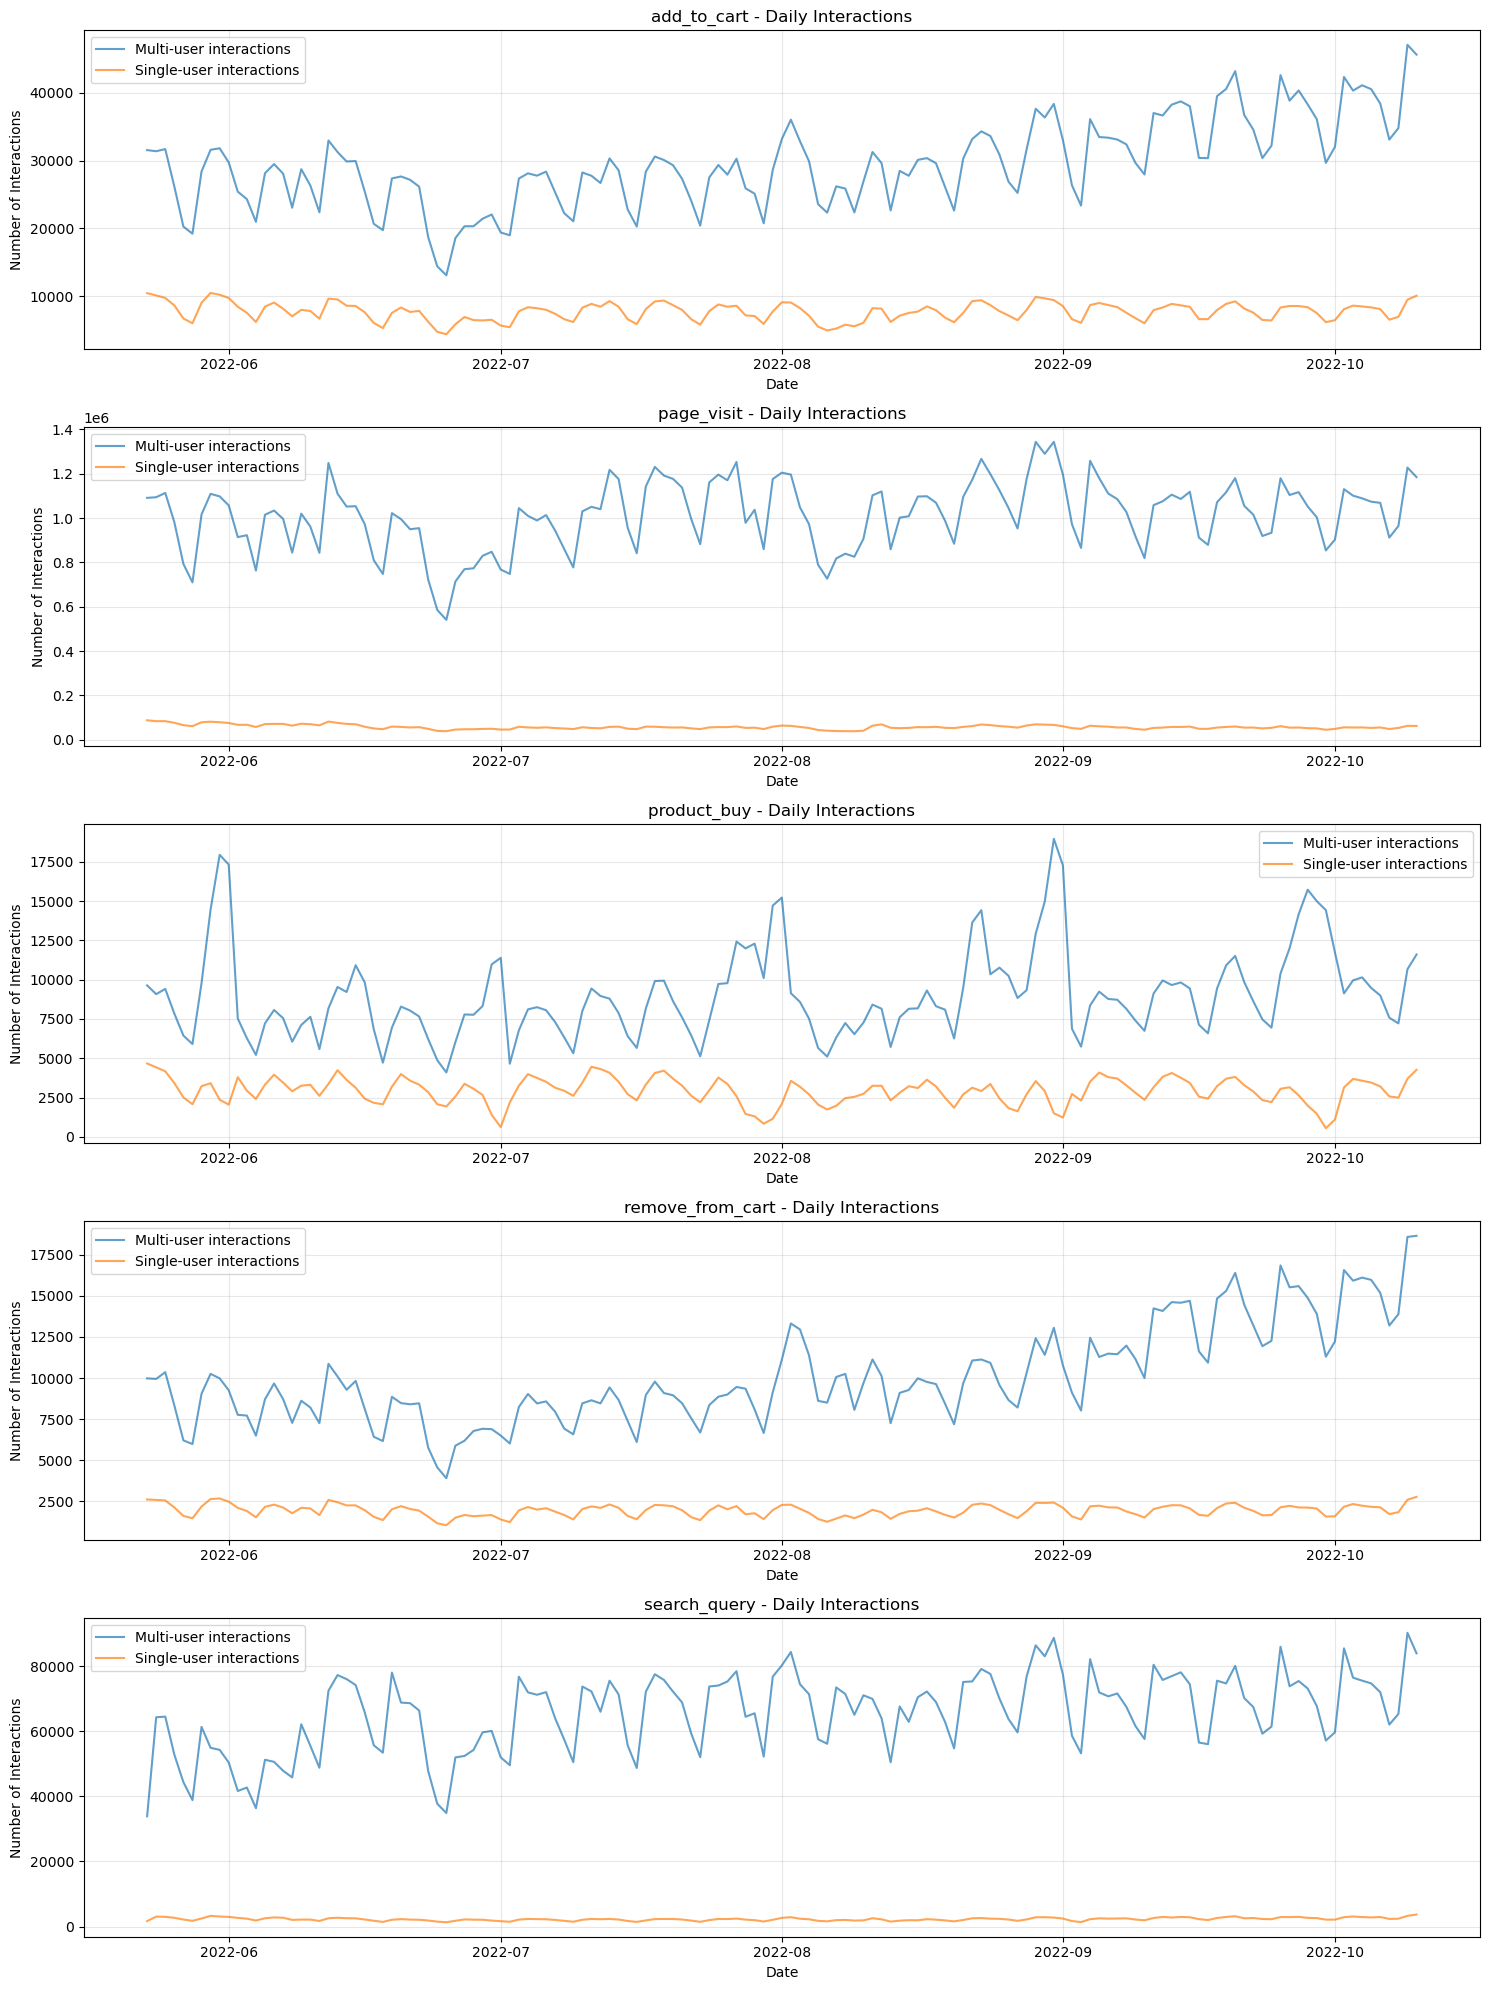

In [17]:

def print_some_usage_stats(fulldata, df_with_user):
  # Convert timestamp to datetime and extract date for all dataframes
  for df_name in df_with_user:
    df = fulldata.__getattribute__(df_name)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['date'] = df['timestamp'].dt.date

  # Calculate daily interaction counts for each dataframe
  daily_stats = {}

  for df_name in df_with_user:
    df = fulldata.__getattribute__(df_name)
    
    # Group by date and is_single, count interactions
    daily_counts = df.groupby(['date', 'is_single']).size().unstack(fill_value=0)
    daily_counts.columns = ['multi_user', 'single_user']
    
    daily_stats[df_name] = daily_counts
    
    print(f"\n{df_name} - Daily interaction counts:")
    print(f"Total days: {len(daily_counts)}")
    print(f"Average daily multi-user interactions: {daily_counts['multi_user'].mean():.2f}")
    print(f"Average daily single-user interactions: {daily_counts['single_user'].mean():.2f}")
    print(daily_counts.head())

  # Plot the daily interaction counts
  fig, axes = plt.subplots(len(df_with_user), 1, figsize=(15, 20))

  for i, df_name in enumerate(df_with_user):
    daily_counts = daily_stats[df_name]
    
    axes[i].plot(daily_counts.index, daily_counts['multi_user'], label='Multi-user interactions', alpha=0.7)
    axes[i].plot(daily_counts.index, daily_counts['single_user'], label='Single-user interactions', alpha=0.7)
    axes[i].set_title(f'{df_name} - Daily Interactions')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Number of Interactions')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

  plt.tight_layout()
  plt.show()

print_some_usage_stats(full_recsys, df_with_user)

In [18]:
df_with_user = [
    'add_to_cart',
    'page_visit',
    'product_buy',
    'remove_from_cart',
    'search_query'
]

# Get users with only one interaction for each dataframe
for df_name in df_with_user:
  df = input_recsys.__getattribute__(df_name)
  user_interaction_counts = df['client_id'].value_counts()
  single_interaction_users = set(user_interaction_counts[user_interaction_counts == 1].index)
  
  # Add is_single column
  df['is_single'] = df['client_id'].isin(single_interaction_users)
  
  print(f"{df_name}: {df['is_single'].sum()} single interactions out of {len(df)} total")

input_recsys.add_to_cart

add_to_cart: 897326 single interactions out of 3959157 total
page_visit: 6908152 single interactions out of 119830356 total
product_buy: 348816 single interactions out of 1315061 total
remove_from_cart: 226556 single interactions out of 1230871 total
search_query: 256816 single interactions out of 7485720 total


,client_id,timestamp,sku,is_single
0,17649961,2022-08-11 12:22:55,1398840,True
1,315805,2022-09-11 05:34:10,1434568,True
2,16696114,2022-07-11 16:27:00,81192,True
3,6297287,2022-06-14 15:52:30,1070234,True
4,14462111,2022-07-14 12:52:50,1428777,True
...,...,...,...,...
3959152,6947176,2022-09-02 12:41:10,119225,True
3959153,3850845,2022-06-12 16:13:59,1461294,True
3959154,12296853,2022-07-29 17:53:45,431834,False
3959155,12296853,2022-08-09 16:16:15,108846,False



add_to_cart - Daily interaction counts:
Total days: 113
Average daily multi-user interactions: 27095.85
Average daily single-user interactions: 7940.94
            multi_user  single_user
date                               
2022-05-23       31313        10685
2022-05-24       31177        10323
2022-05-25       31472         9966
2022-05-26       26001         8825
2022-05-27       20110         6850

page_visit - Daily interaction counts:
Total days: 113
Average daily multi-user interactions: 999311.54
Average daily single-user interactions: 61134.09
            multi_user  single_user
date                               
2022-05-23     1088837        89784
2022-05-24     1091809        85743
2022-05-25     1111132        85948
2022-05-26      979863        78416
2022-05-27      791464        67210

product_buy - Daily interaction counts:
Total days: 113
Average daily multi-user interactions: 8550.84
Average daily single-user interactions: 3086.87
            multi_user  single_user
d

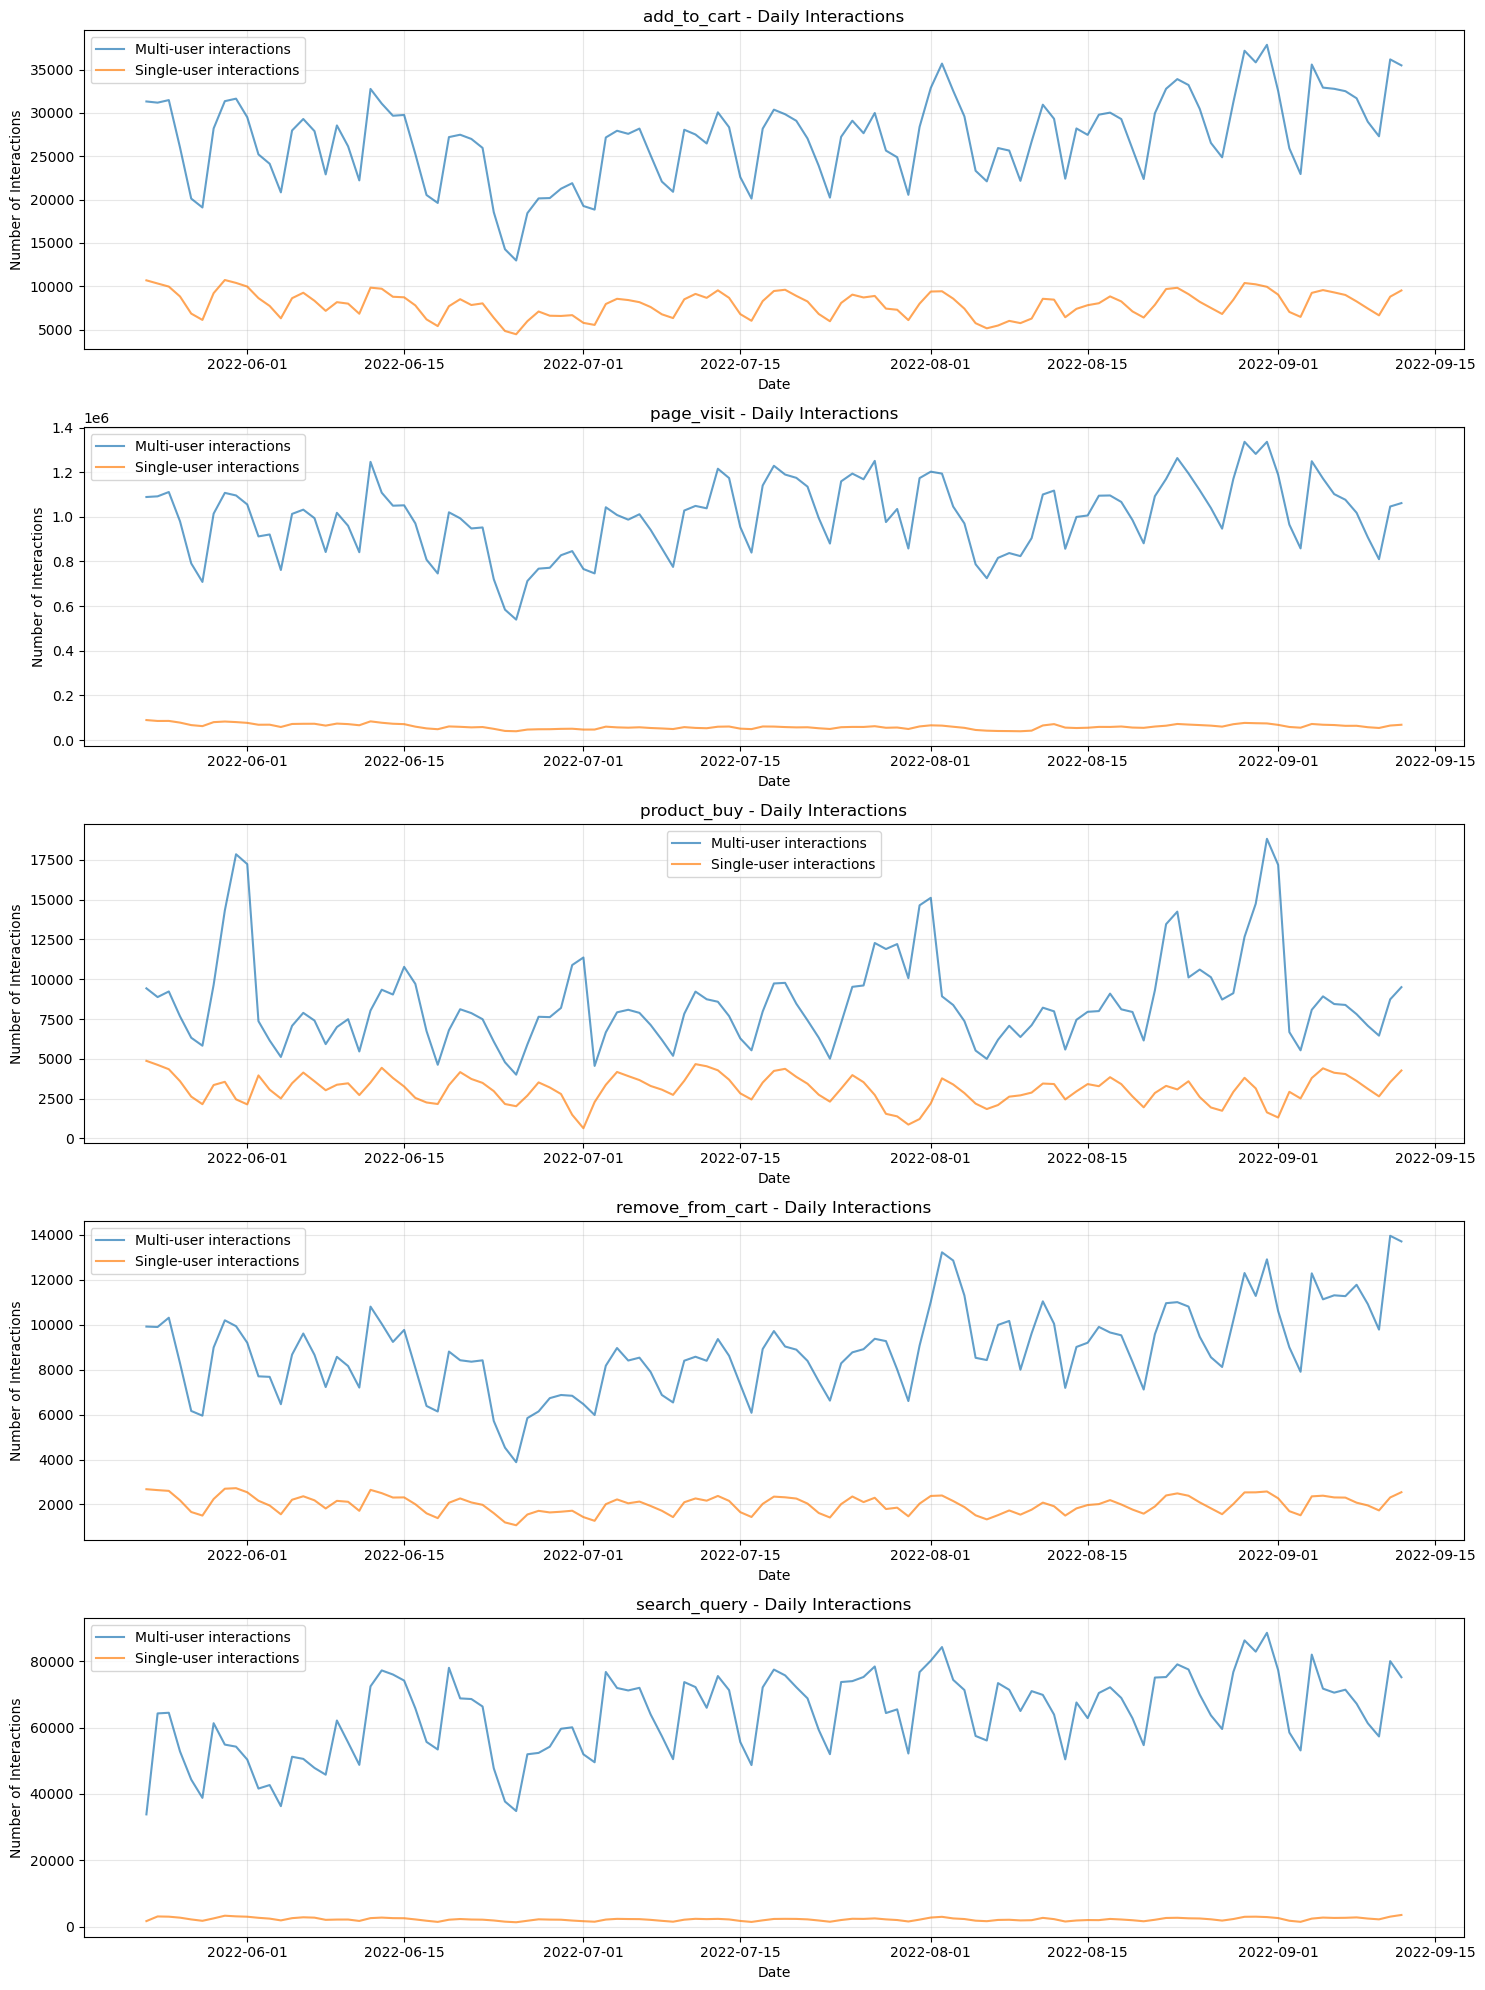

In [19]:
print_some_usage_stats(input_recsys, df_with_user)

2 weeks in train/val

couple of months in for embeddings

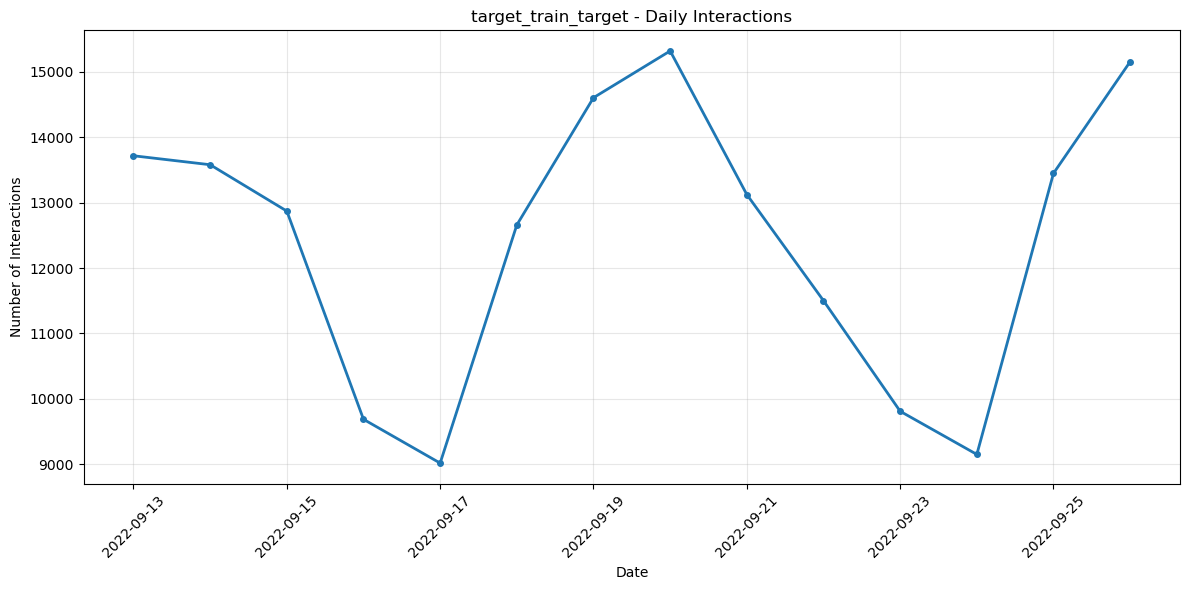

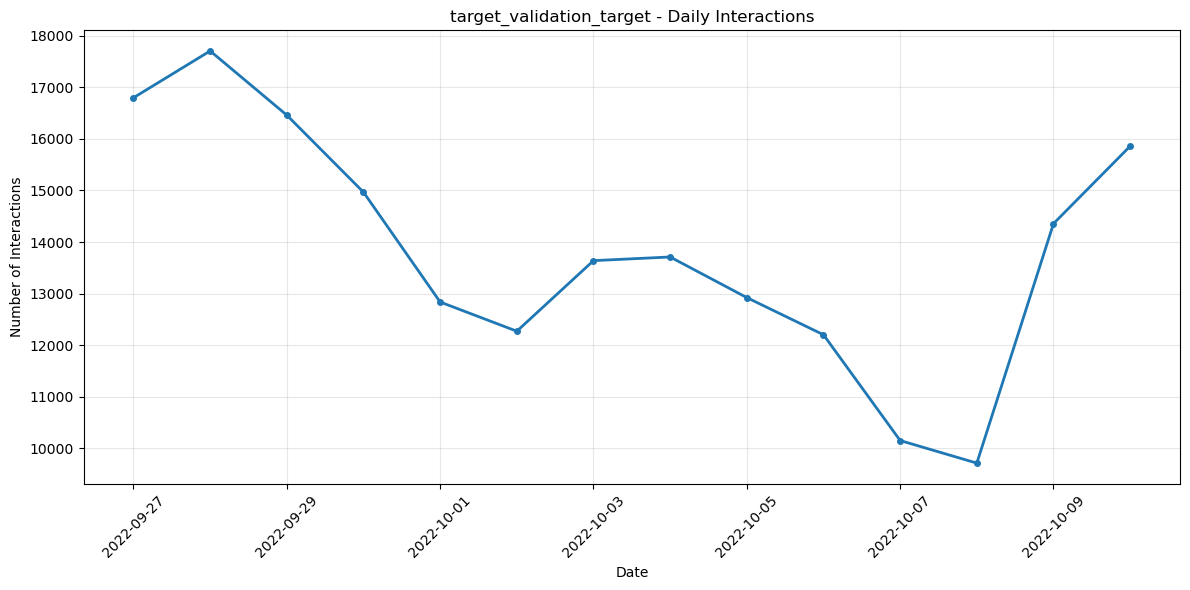

In [20]:

def plot_number_of_interactions_daily(df, title):
  # Convert timestamp to datetime if not already
  df['timestamp'] = pd.to_datetime(df['timestamp'])
  df['date'] = df['timestamp'].dt.date
  
  # Count interactions per day
  daily_counts = df.groupby('date').size()
  
  # Create the plot
  plt.figure(figsize=(12, 6))
  plt.plot(daily_counts.index, daily_counts.values, marker='o', linewidth=2, markersize=4)
  plt.title(f'{title} - Daily Interactions')
  plt.xlabel('Date')
  plt.ylabel('Number of Interactions')
  plt.grid(True, alpha=0.3)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

plot_number_of_interactions_daily(target_train_target, 'target_train_target')
plot_number_of_interactions_daily(target_validation_target, 'target_validation_target')

In [21]:
input_users = input_recsys.all_users_set()
full_users = full_recsys.all_users_set()

In [29]:
print(len(target_active_clients))
print(len(input_users))
print(len(full_users))

# print sizes of intersection of relevant clients with input users and full users
intersection_input = len(set(input_relevant_clients).intersection(set(input_users)))
intersection_full = len(set(input_relevant_clients).intersection(set(full_users)))
print(f"Intersection of input_relevant_clients with input_users: {intersection_input / len(input_relevant_clients)}")
print(f"Intersection of input_relevant_clients with full_users: {intersection_full / len(input_relevant_clients)}")

# Calculate number of unique client_ids in target datasets
unique_train_clients = target_train_target['client_id'].nunique()
unique_validation_clients = target_validation_target['client_id'].nunique()

print(f"Unique clients in target_train_target: {unique_train_clients}")
print(f"Unique clients in target_validation_target: {unique_validation_clients}")

# Get the sets of unique client_ids
train_client_set = set(target_train_target['client_id'].unique())
validation_client_set = set(target_validation_target['client_id'].unique())

# Check if all clients are in target_active_clients
target_active_set = set(target_active_clients)

print(f"All train clients in target_active_clients: {train_client_set.issubset(target_active_set)}")
print(f"All validation clients in target_active_clients: {validation_client_set.issubset(target_active_set)}")

print(f"All train clients in input_users: {train_client_set.issubset(input_users)}")
print(f"All validation clients in input_users: {validation_client_set.issubset(input_users)}")

# print percentages of train/validation clients who are in input_users
train_in_input_users = len(train_client_set.intersection(input_users)) / len(train_client_set)
validation_in_input_users = len(validation_client_set.intersection(input_users)) / len(validation_client_set)
print(f"Percentage of train clients in input_users: {train_in_input_users:.3%}")
print(f"Percentage of validation clients in input_users: {validation_in_input_users:.3%}")

print(f"All train clients in all users (doh): {train_client_set.issubset(full_users)}")
print(f"All validation clients in all users (doh): {validation_client_set.issubset(full_users)}")

# Additional stats
print(f"Total unique clients across both datasets: {len(train_client_set.union(validation_client_set))}")
print(f"Overlap between train and validation clients: {len(train_client_set.intersection(validation_client_set))}")

750860
15781713
18889063
Intersection of input_relevant_clients with input_users: 0.858489
Intersection of input_relevant_clients with full_users: 1.0
Unique clients in target_train_target: 96592
Unique clients in target_validation_target: 95119
All train clients in target_active_clients: True
All validation clients in target_active_clients: True
All train clients in input_users: False
All validation clients in input_users: False
Percentage of train clients in input_users: 47.066%
Percentage of validation clients in input_users: 43.753%
All train clients in all users (doh): True
All validation clients in all users (doh): True
Total unique clients across both datasets: 181555
Overlap between train and validation clients: 10156


In [23]:
def split_product_buy(product_buy_df, users_in_train):
  known_product_buy = product_buy_df[product_buy_df['client_id'].isin(users_in_train)].copy().reset_index(drop=True)
  unknown_product_buy = product_buy_df[~product_buy_df['client_id'].isin(users_in_train)].copy().reset_index(drop=True)
  
  return known_product_buy, unknown_product_buy


In [24]:
all_categories = full_recsys.product_properties['category'].unique()
all_categories.sort()
all_categories

array([   0,    1,    2, ..., 6916, 6917, 6918])

In [25]:
from our_lib import NodeIdMap

buy_df = target_train_target
known_users = set(buy_df['client_id'].unique()).intersection(input_users)
# Split the product_buy data into known and unknown for training
active_buy_df, _inactive_buy_df = split_product_buy(buy_df, known_users)

users_in_train_list = list(input_users)

node_id_map = NodeIdMap(users_in_train_list, all_categories)
train_edge_index = node_id_map.make_edges(active_buy_df.client_id.values, active_buy_df.category.values)
train_edge_index

tensor([[13663879,  5063031, 15454333,  ...,  4635487,  4635487,  4978176],
        [15783677, 15786532, 15787735,  ..., 15783171, 15783171, 15786304]])